# Dataset Classics

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 
from sklearn.datasets import load_iris, load_wine, load_boston, load_breast_cancer, load_diabetes, load_digits
sns.set()
%matplotlib inline

### Wine
- UCI: [https://archive.ics.uci.edu/ml/datasets/wine]
- Sklearn User Guide: [https://scikit-learn.org/stable/datasets/index.html#wine-dataset]

In [9]:
wine_data = load_wine()
df_wine = pd.DataFrame(np.concatenate([wine_data.data, wine_data.target.reshape(-1,1)], axis=1), columns=wine_data.feature_names + ['target'])
df_wine.target = df_wine.target.astype(int)

In [10]:
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


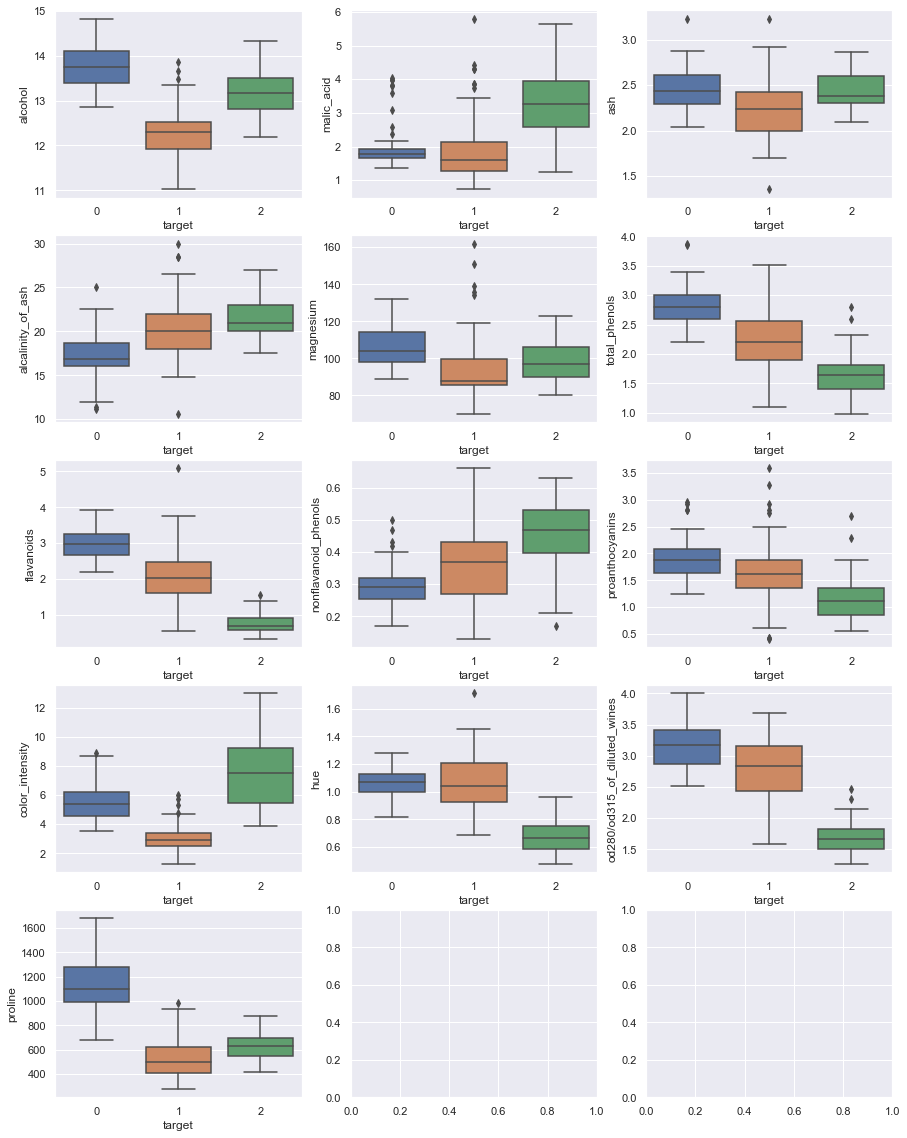

In [11]:
features = df_wine.columns[:-1]
len(features)
fig, ax = plt.subplots(5, 3, figsize=(15,20))
for i, feature in enumerate(features, 1):
    plt.subplot(5,3,i)
    sns.boxplot(x='target', y=feature, data=df_wine)


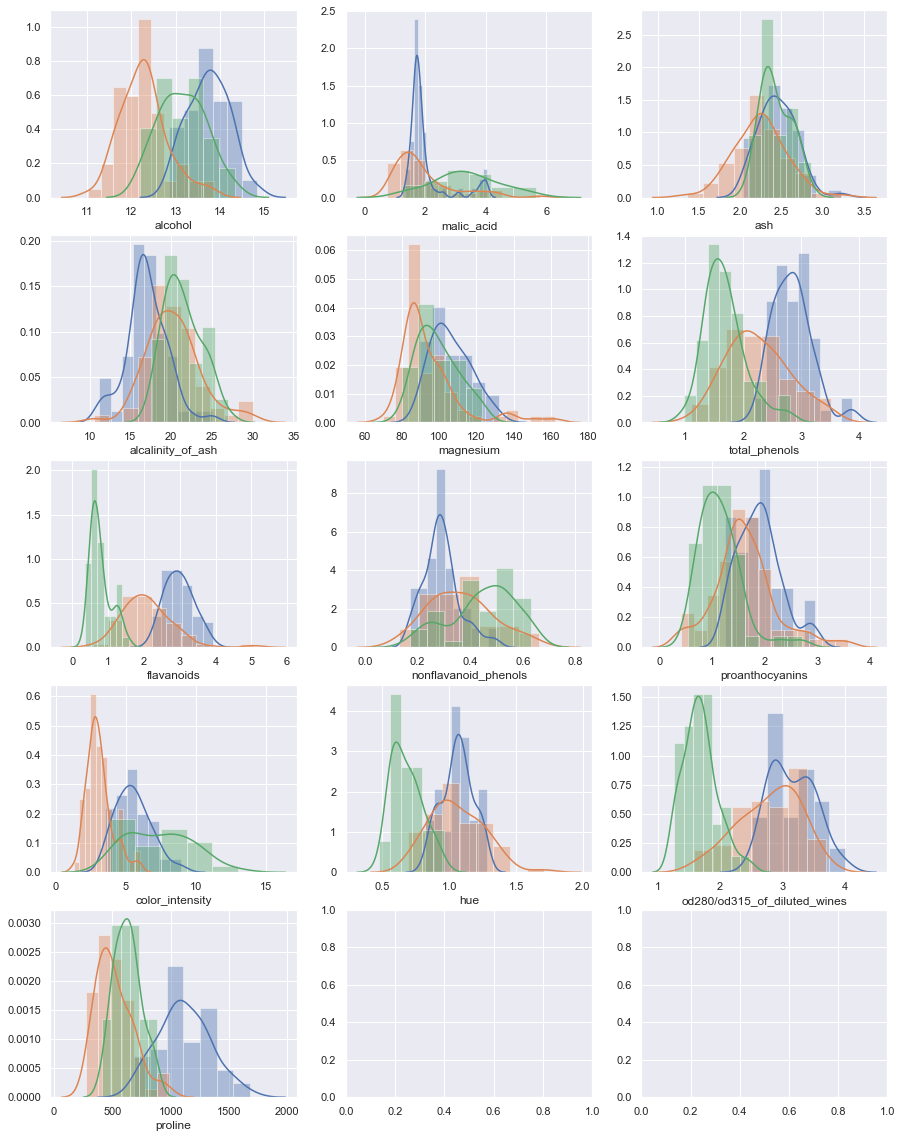

In [18]:
fig, ax = plt.subplots(5,3, figsize=(15, 20))
for i, feature in enumerate(features, 1):
    plt.subplot(5,3, i)
    sns.distplot(df_wine[df_wine['target'] == 0][feature])
    sns.distplot(df_wine[df_wine['target'] == 1][feature])
    sns.distplot(df_wine[df_wine['target'] == 2][feature])


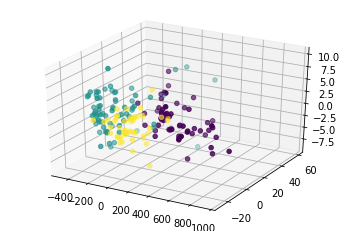

In [5]:
from sklearn.decomposition import PCA

X = df_wine.iloc[:, 0:-1]

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)
#sns.scatterplot(x=pca_result[:, 0], y=pca_result[:,1], hue=df_wine['target'])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=pca_result[:, 0], ys=pca_result[:,1], zs=pca_result[:,2], c=df_wine['target'])

## Diabetes
- UCI: [https://archive.ics.uci.edu/ml/datasets/diabetes]
- Sklearn User Guide: [https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset]

In [9]:
ds_diabetes = load_diabetes()

In [10]:
ds_diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [11]:
# build data frame
df_diabetes = pd.DataFrame(ds_diabetes.data, columns= ds_diabetes.feature_names)
df_diabetes = pd.concat([df_diabetes, pd.DataFrame({'target':ds_diabetes.target})], axis=1)
df_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


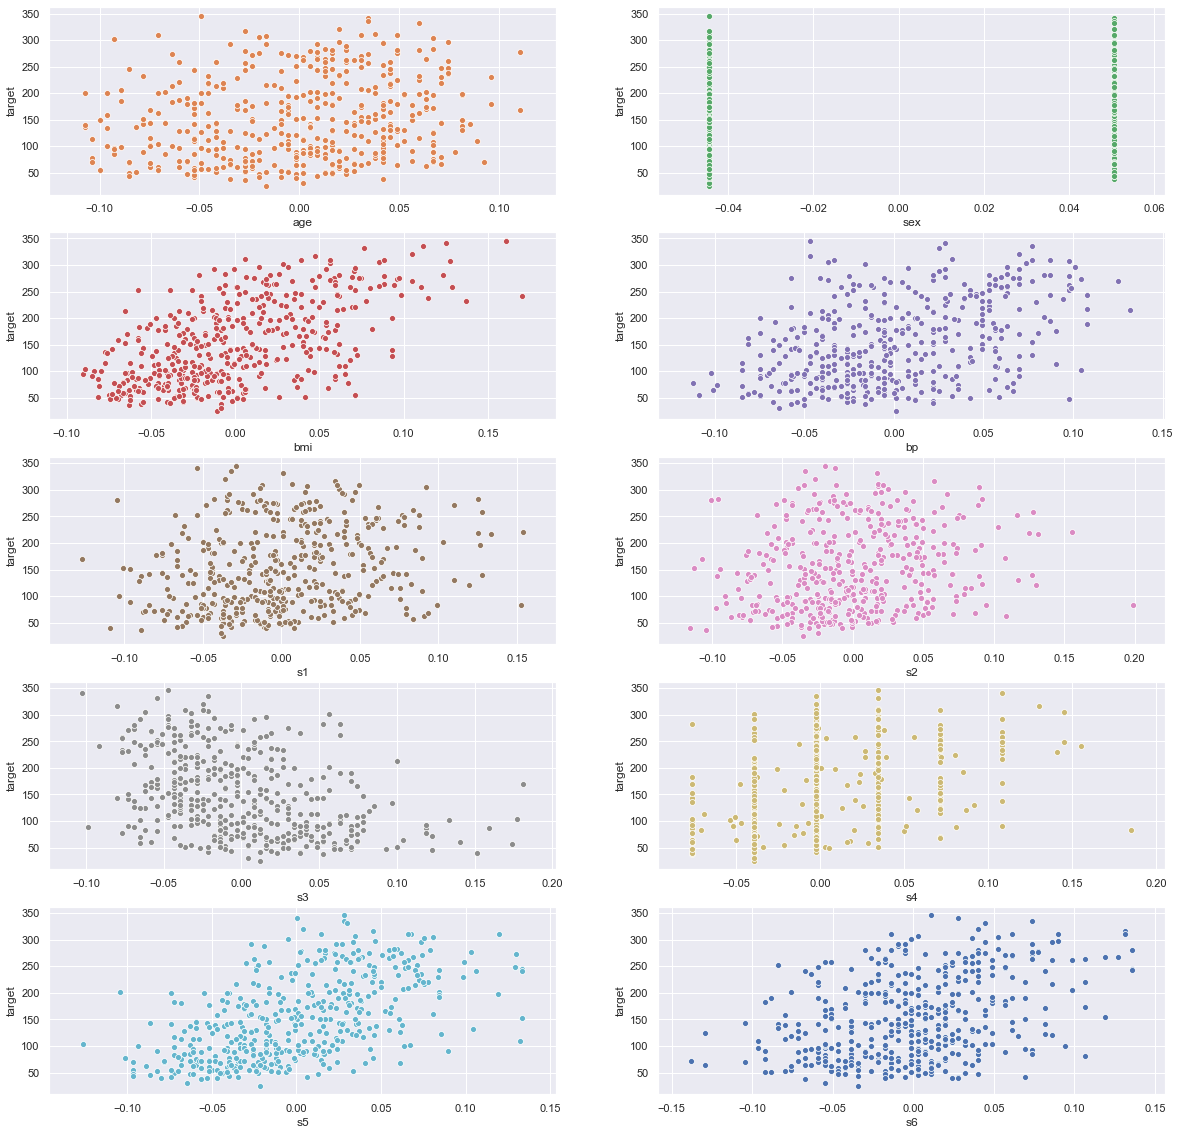

In [18]:
# create scatterplots
sns.set()
fig, ax = plt.subplots(5,2, figsize=(20,20))
for i, feature in enumerate(df_diabetes.columns[:-1], 1):
    plt.subplot(5, 2, i)
    sns.scatterplot(data=df_diabetes, y='target', x=feature, color="C" + str(i))

In [32]:
# build training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_diabetes.iloc[:, :-1], df_diabetes['target'])

In [41]:
## Linear Regression with sklearn
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.coef_

array([  23.2633207 , -266.83716769,  521.58291598,  319.45591551,
       -431.80956466,  184.96344033,  -53.04119735,   98.64871245,
        639.07101926,   33.70764335])

In [42]:
## Linear Regression with statsmodels
import statsmodels.api as sm

In [43]:
X_train_c = sm.add_constant(X_train)
sm_linear_model = sm.OLS(y_train, X_train_c).fit()
sm_linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     33.35
Date:                Sun, 15 Nov 2020   Prob (F-statistic):           4.91e-44
Time:                        07:23:10   Log-Likelihood:                -1783.8
No. Observations:                 331   AIC:                             3590.
Df Residuals:                     320   BIC:                             3631.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        147.4925      2.978     49.529      0.000     141.634     153.351
age           23.2633     68.231      0.341      0.733    -110.974     157.501
sex         -266.8372     70.343     -3.793      0.000    -405.230    -128.445
bmi          521.5829     75.480      6.910      0.000     373.083     670.083
bp           319.4559     73.499      4.346      0.000     174.853     464.059
s1          -431.8096    478.725     -0.902      0.368   -1373.655     510.036
s2           184.9634    391.615      0.472      0.637    -585.502     955.429
s3           -53.0412    241.351     -0.220      0.826    -527.875     421.793
s4            98.6487    179.031      0.551      0.582    -253.578     450.876
s5           639.0710    198.870      3.214      0.001     247.814    1030.328
s6            33.7076     78.276      0.431      0.667    -120.292     187.708
==============================================================================
Omnibus:                        1.034   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.596   Jarque-Bera (JB):                1.134
Skew:                           0.098   Prob(JB):                        0.567
Kurtosis:                       2.791   Cond. No.                         228.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""